In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

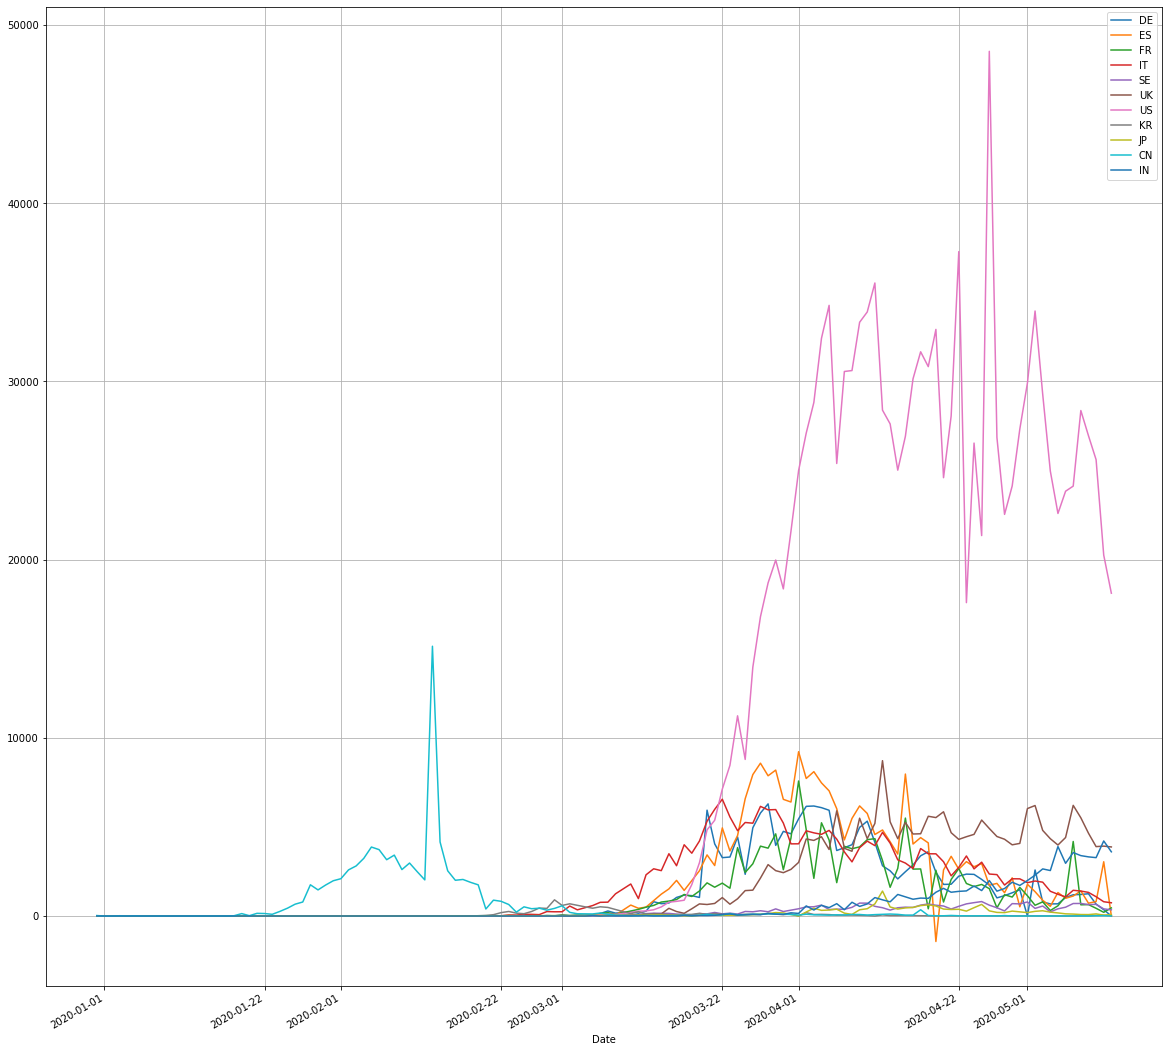

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

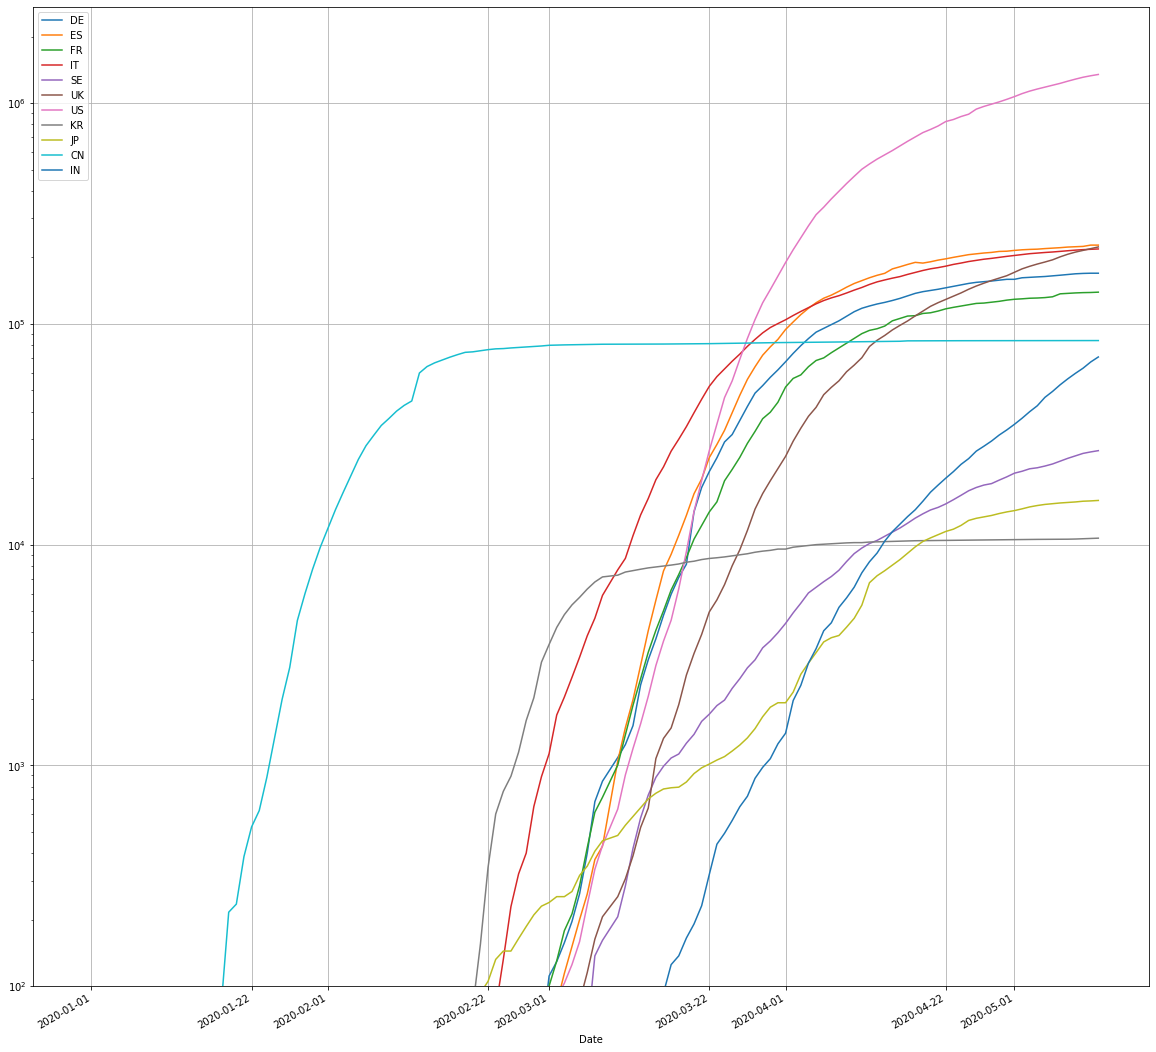

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

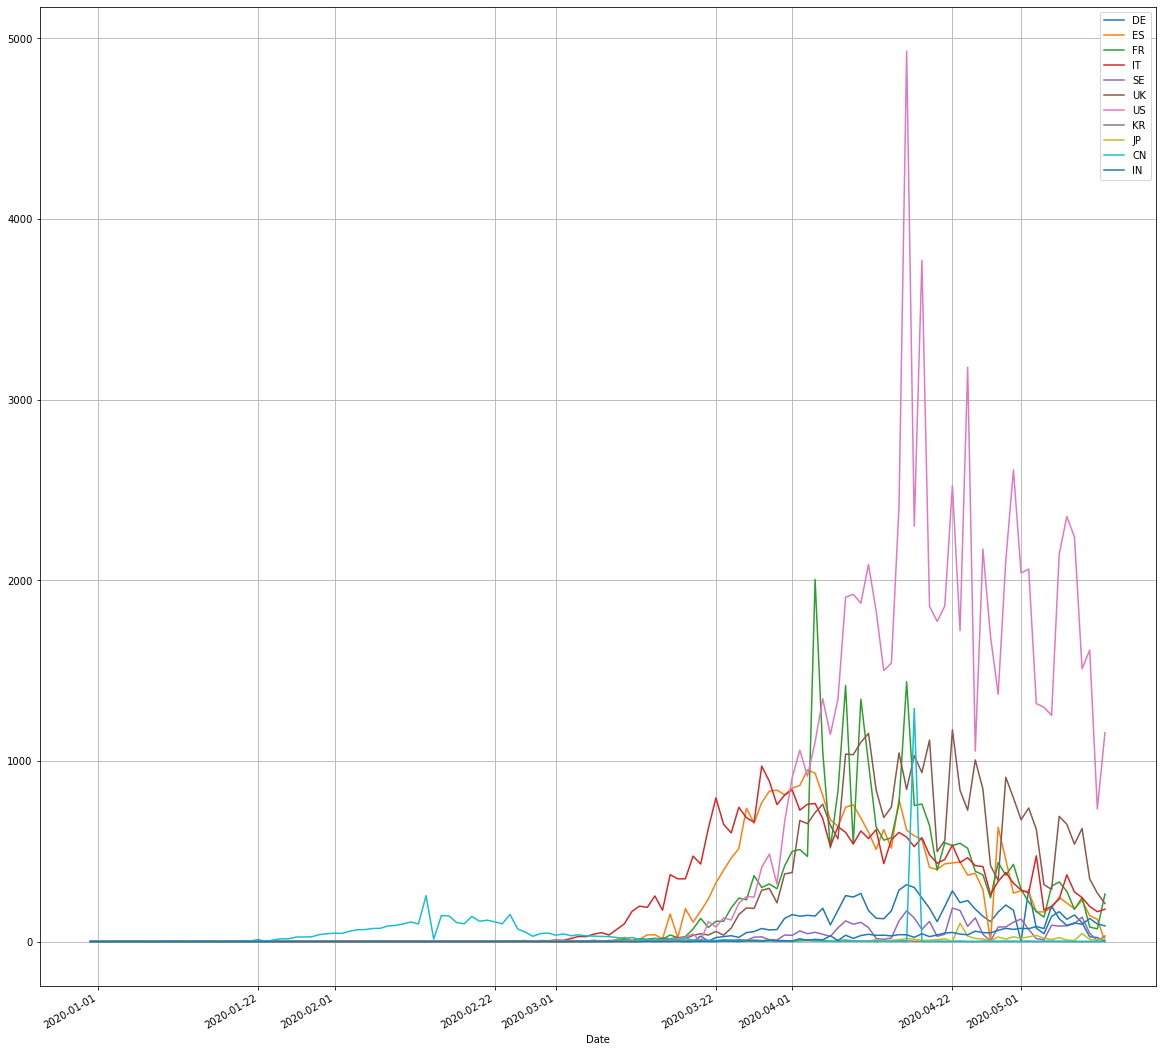

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

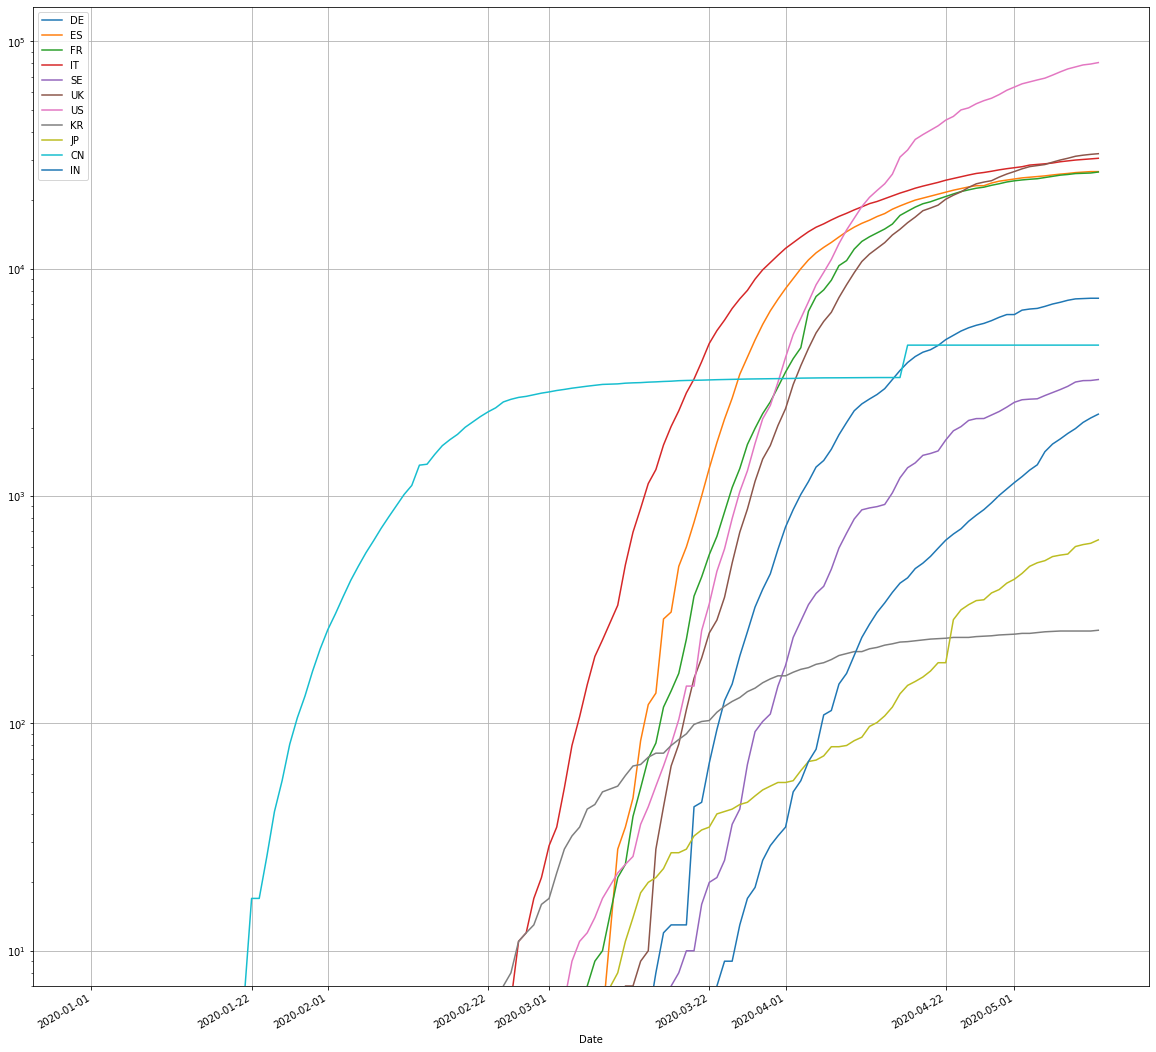

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-04-28,1144.0,1308.0,1195,1739,286,4309,22541,14,191,26,1543
12,2020-04-29,1304.0,2144.0,1065,2091,695,3996,24132,9,276,2,1897
11,2020-04-30,1478.0,518.0,1607,2086,681,4076,27326,4,236,4,1718
10,2020-05-01,0.0,1781.0,1139,1872,790,6032,29917,9,193,12,1993
9,2020-05-02,2584.0,1366.0,604,1965,428,6201,33955,6,263,3,2293
8,2020-05-03,793.0,884.0,794,1900,562,4806,29288,13,295,2,2644
7,2020-05-04,679.0,545.0,308,1389,235,4339,24972,8,218,3,2553
6,2020-05-05,685.0,1318.0,576,1221,404,3985,22593,3,174,2,3900
5,2020-05-06,1037.0,996.0,1104,1075,495,4406,23841,2,123,2,2958
4,2020-05-07,1194.0,1122.0,4183,1444,702,6211,24128,4,109,2,3561


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-04-28,156282.0,210614.0,125360.0,197922.0,18884.0,157082.0,988330.0,10504.0,13543.0,83893.0,29435.0
2020-04-29,157586.0,212758.0,126425.0,200013.0,19579.0,161078.0,1012462.0,10513.0,13819.0,83895.0,31332.0
2020-04-30,159064.0,213276.0,128032.0,202099.0,20260.0,165154.0,1039788.0,10517.0,14055.0,83899.0,33050.0
2020-05-01,159064.0,215057.0,129171.0,203971.0,21050.0,171186.0,1069705.0,10526.0,14248.0,83911.0,35043.0
2020-05-02,161648.0,216423.0,129775.0,205936.0,21478.0,177387.0,1103660.0,10532.0,14511.0,83914.0,37336.0
2020-05-03,162441.0,217307.0,130569.0,207836.0,22040.0,182193.0,1132948.0,10545.0,14806.0,83916.0,39980.0
2020-05-04,163120.0,217852.0,130877.0,209225.0,22275.0,186532.0,1157920.0,10553.0,15024.0,83919.0,42533.0
2020-05-05,163805.0,219170.0,131453.0,210446.0,22679.0,190517.0,1180513.0,10556.0,15198.0,83921.0,46433.0
2020-05-06,164842.0,220166.0,132557.0,211521.0,23174.0,194923.0,1204354.0,10558.0,15321.0,83923.0,49391.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-04-28,163.0,632.0,437,333,80,338,1369,1,25,0,62
12,2020-04-29,202.0,453.0,367,382,81,909,2110,2,13,0,73
11,2020-04-30,173.0,268.0,427,323,107,795,2611,1,26,0,67
10,2020-05-01,0.0,281.0,289,285,124,674,2040,1,17,0,73
9,2020-05-02,287.0,276.0,218,269,67,739,2062,2,26,0,71
8,2020-05-03,74.0,164.0,166,474,16,621,1317,0,34,0,83
7,2020-05-04,43.0,164.0,135,174,10,315,1297,2,18,0,72
6,2020-05-05,139.0,185.0,306,195,90,288,1252,2,11,0,195
5,2020-05-06,165.0,244.0,330,236,85,693,2144,1,22,0,126
4,2020-05-07,123.0,213.0,278,369,87,649,2353,1,8,0,89


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-04-28,5913.0,23822.0,23284.0,26844.0,2274.0,24393.0,56241.0,243.0,375.0,4614.0,934.0
2020-04-29,6115.0,24275.0,23651.0,27226.0,2355.0,25302.0,58351.0,245.0,388.0,4614.0,1007.0
2020-04-30,6288.0,24543.0,24078.0,27549.0,2462.0,26097.0,60962.0,246.0,414.0,4614.0,1074.0
2020-05-01,6288.0,24824.0,24367.0,27834.0,2586.0,26771.0,63002.0,247.0,431.0,4614.0,1147.0
2020-05-02,6575.0,25100.0,24585.0,28103.0,2653.0,27510.0,65064.0,249.0,457.0,4614.0,1218.0
2020-05-03,6649.0,25264.0,24751.0,28577.0,2669.0,28131.0,66381.0,249.0,491.0,4614.0,1301.0
2020-05-04,6692.0,25428.0,24886.0,28751.0,2679.0,28446.0,67678.0,251.0,509.0,4614.0,1373.0
2020-05-05,6831.0,25613.0,25192.0,28946.0,2769.0,28734.0,68930.0,253.0,520.0,4614.0,1568.0
2020-05-06,6996.0,25857.0,25522.0,29182.0,2854.0,29427.0,71074.0,254.0,542.0,4614.0,1694.0
